## Capstone 3: Data Wrangling and EDA on X-Ray data set


## Install necassary libraries 

In [ ]:
pip install opencv-python

In [2]:
pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import os

2024-11-30 16:18:10.922940: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data manipulation to perform EDA

Create a function that gets data from directory and lables it based on Normal or Pneumonia 

In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)  # Numeric label for the category
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    print(f"Skipping file {img} as it could not be read.")
                    continue
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Resize image
                data.append([resized_arr, class_num])  # Add image and label
            except Exception as e:
                print(f"Error processing file {img}: {e}")
    return np.array(data, dtype=object)  # Allow mixed data types (image, label)

In [ ]:
print(os.getcwd())
#/Users/vcarrillo/Downloads/chest_xray/__MACOSX/chest_xray

/Users/vcarrillo/Downloads/chest_xray/__MACOSX/chest_xray


In [ ]:
train = get_training_data('/Users/vcarrillo/Downloads/chest_xray/train')


In [12]:
test = get_training_data('/Users/vcarrillo/Downloads/chest_xray/test')

In [14]:
val = get_training_data('/Users/vcarrillo/Downloads/chest_xray/val')

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_15718/1137843332.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_series, palette={"Pneumonia": "red", "Normal": "green"})


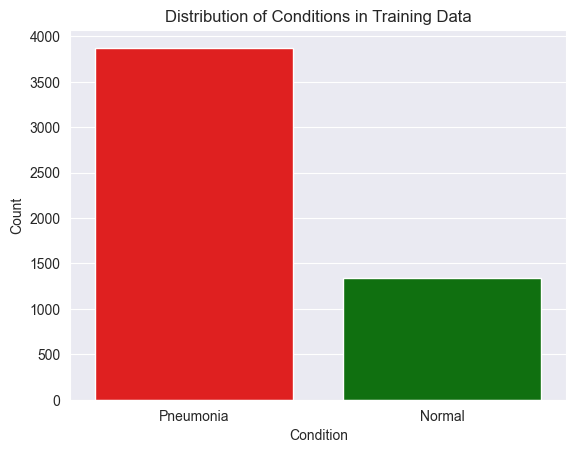

In [17]:
# Convert the list to a Pandas Series for Seaborn compatibility
list = []
for i in train:
    if i[1] == 0:
        list.append("Pneumonia")
    else:
        list.append("Normal")

# Convert to Pandas Series
label_series = pd.Series(list, name="Condition")

# Plot with Seaborn
sns.set_style('darkgrid')
sns.countplot(x=label_series, palette={"Pneumonia": "red", "Normal": "green"})

# Add titles and labels
plt.title("Distribution of Conditions in Training Data")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

In [ ]:
#Count number of conditions 
label_series.value_counts()

Condition
Pneumonia    3875
Normal       1341
Name: count, dtype: int64

In [ ]:
#Total number of images in training set 
label_series.value_counts().sum()

5216

## Observation: Dataset is imbalanced, this might affect results. 

## Possible Soluntions: Oversampling, undersampling, or data augmentation. 

In [33]:
label_series.describe()

count          5216
unique            2
top       Pneumonia
freq           3875
Name: Condition, dtype: object

In [64]:
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(val)}")
print(f"Test set size: {len(test)}")


Training set size: 5216
Validation set size: 16
Test set size: 624


## Visualizing differences in pixel intensity between Normal and Pneumonia 

In [35]:
print(type(train))

<class 'numpy.ndarray'>


In [ ]:
# Separate images by condition normal and pneumonia 
normal_images = train[train[:, 1] == 0][:, 0]  # Images with 0 are Normal
pneumonia_images = train[train[:, 1] == 1][:, 0]  # Images with label 1 are Pneumonia



In [ ]:
# Flatten pixel values for each class
def flatten_pixel_intensities(images):
    intensities = []
    for img in images:
        intensities.extend(img.ravel())  # Flatten and collect pixel values
    return np.array(intensities)

# Calculate pixel intensities
normal_intensities = flatten_pixel_intensities(normal_images)
pneumonia_intensities = flatten_pixel_intensities(pneumonia_images)


In [ ]:
#Mean for normal intensities 
normal_intensities.mean()

123.0886053046595

In [ ]:
#Median of normal images intensity 
np.median(normal_intensities)

134.0

In [67]:
#Mean for Pneumonia intensities 
pneumonia_intensities.mean()

122.27166668323805

In [ ]:
#Median of pneumonia images intensity 
np.median(pneumonia_intensities)

132.0

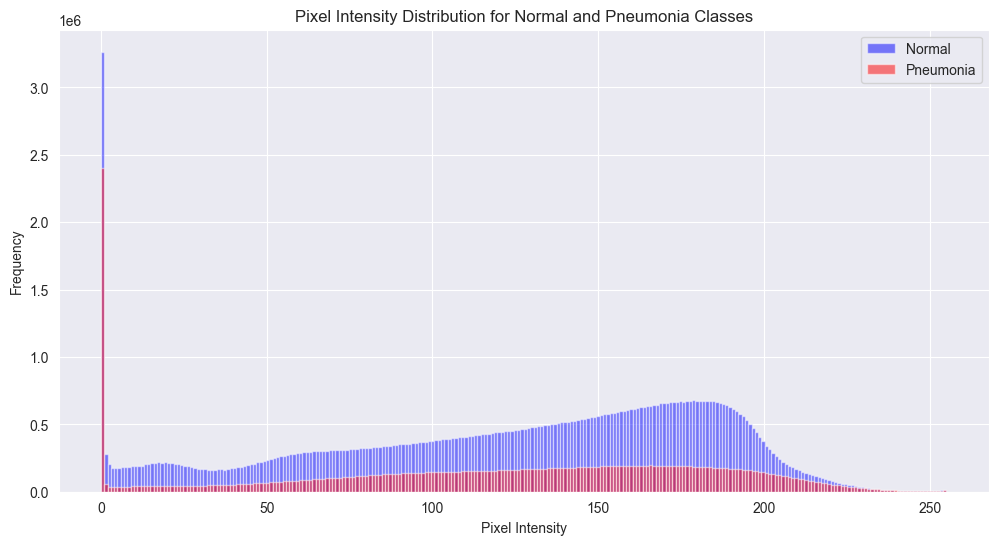

In [ ]:
#Visualize the difference in intensity between both conditions.

#Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(normal_intensities, bins=256, alpha=0.5, label='Normal', color='blue', range=(0, 255))
plt.hist(pneumonia_intensities, bins=256, alpha=0.5, label='Pneumonia', color='red', range=(0, 255))
plt.title('Pixel Intensity Distribution for Normal and Pneumonia Classes')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()



## Observation: Pixel intensity seems to be an important feature in seperating X-Ray images with and without Pneumonia. 

## Visualizing some of the training data images

Text(0.5, 1.0, 'NORMAL')

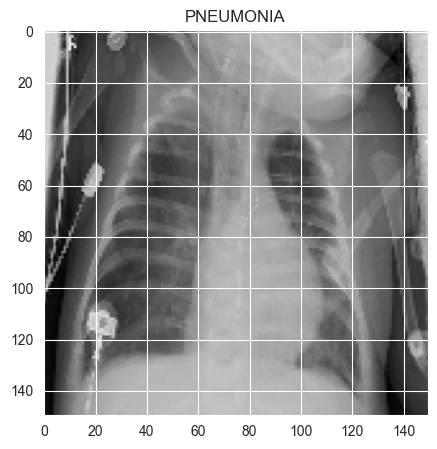

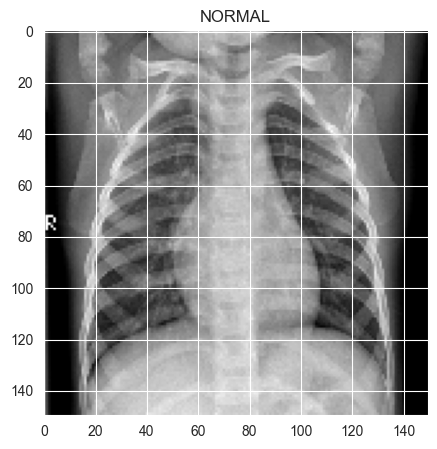

In [27]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])